# K Means Clustering Implementation

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
X,y=make_blobs(n_samples=1000,centers=3,n_features=2,random_state=23)
#main focus on x variable because y in not important in clustering

In [3]:
X.shape

(1000, 2)

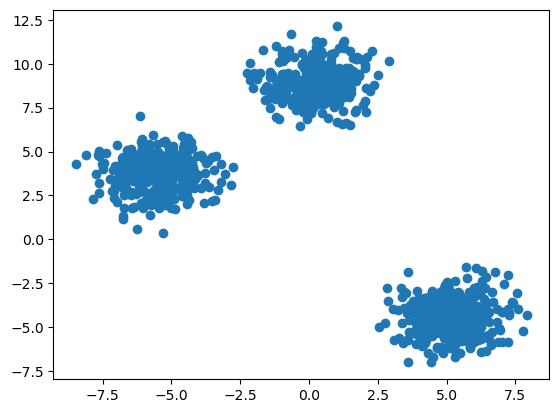

In [4]:
plt.scatter(X[:,0],X[:,1])

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [6]:
from sklearn.cluster import KMeans

In [7]:
# Manual Process
# Elbow method to select the K value

wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


In [8]:
wcss

[34827.57682552022,
 7935.4372861454185,
 1319.2730531585607,
 1140.467788465513,
 991.8899785187884,
 853.7528135404276,
 757.5478747725863,
 670.6452941452472,
 579.4393403523053,
 534.5722652224829]

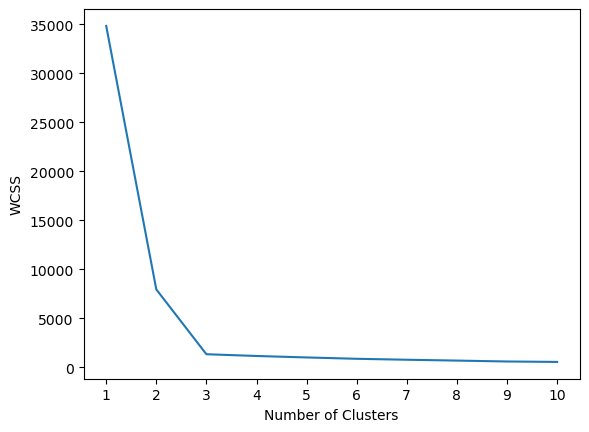

In [9]:
# plot elbow curve
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [10]:
kmeans=KMeans(n_clusters=3,init="k-means++")

In [11]:
y_labels=kmeans.fit_predict(X_train)

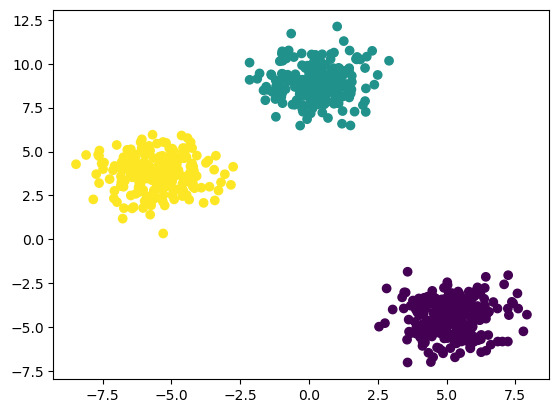

In [12]:
plt.scatter(X_train[:,0],X_train[:,1],c=y_labels)

In [13]:
y_test_labels=kmeans.predict(X_test)

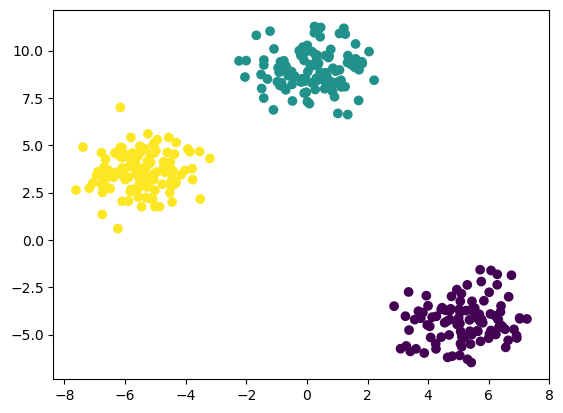

In [14]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_test_labels)

In [15]:
# Knee locator
!pip install kneed

Defaulting to user installation because normal site-packages is not writeable


In [16]:
from kneed import KneeLocator

In [17]:
kl=KneeLocator(range(1,11),wcss,curve='convex',direction='decreasing')
kl.elbow

3

Performance Metrix

In [18]:
# Silhoutte score
from sklearn.metrics import silhouette_score

In [19]:
silhouette_coefficients=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train)
    score=silhouette_score(X_train,kmeans.labels_)
    silhouette_coefficients.append(score)

In [20]:
silhouette_coefficients

[0.7281443868598331,
 0.8071181203797672,
 0.6357733426488265,
 0.49134355005793395,
 0.33727775723886533,
 0.32958877720596585,
 0.3383023686476219,
 0.3280855012448495,
 0.33929864659929543]

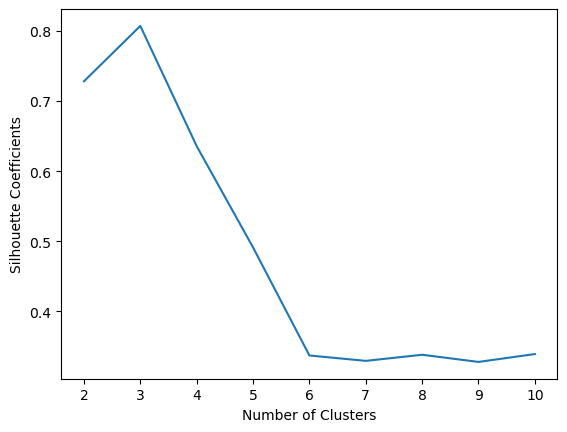

In [21]:
# Plotting silhouette score
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficients")
plt.show()